# Ionoshpere dataset


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from ucimlrepo import fetch_ucirepo

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 351 - Features 33 - Class 2
   Attribute1  Attribute3  Attribute4  Attribute5  Attribute6  Attribute7  \
0         1.0     0.99539    -0.05889     0.85243     0.02306     0.83398   
1         1.0     1.00000    -0.18829     0.93035    -0.36156    -0.10868   
2         1.0     1.00000    -0.03365     1.00000     0.00485     1.00000   
3         1.0     1.00000    -0.45161     1.00000     1.00000     0.71216   
4         1.0     1.00000    -0.02401     0.94140     0.06531     0.92106   

   Attribute8  Attribute9  Attribute10  Attribute11  ...  Attribute25  \
0    -0.37708     1.00000      0.03760      0.85243  ...      0.56811   
1    -0.93597     1.00000     -0.04549      0.50874  ...     -0.20332   
2    -0.12062     0.88965      0.01198      0.73082  ...      0.57528   
3    -1.00000     0.00000      0.00000      0.00000  ...      1.00000   
4    -0.23255     0.77152     -0.16399      0.52798  ...      0.03286   

   Attribute26  Attribute27  Attribute28  Attribute29  Attri

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


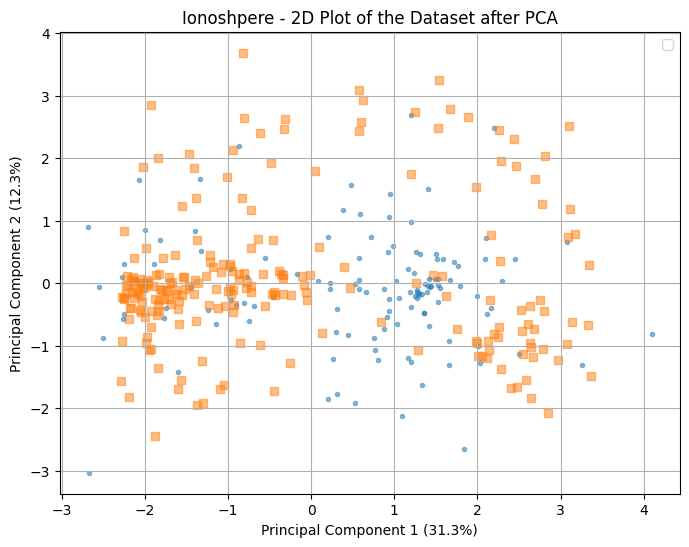

In [2]:

# fetch dataset
df = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = df.data.features
X = X.fillna(0)
X = X.astype(float)
X = X.loc[:, (X != 0).any(axis=0)]
y = df.data.targets
c = 2

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
plotting(X, y, ds_name="Ionoshpere", matrix_plot=False)

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [3]:
# %%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

[1, 514.9113195209192]
[2, 287.82456921744006]
[3, 286.89548676032524]
[4, 286.27915693340407]
[5, 284.70745888110673]
[6, 281.39010476928695]
[7, 276.9699416307334]
[8, 273.9139242475389]
[9, 272.7817000403544]
[10, 272.48625470488093]
[11, 272.41287169891467]
[12, 272.39243737917957]
[13, 272.38593214148614]
[14, 272.38367195611926]
[15, 272.3828523757231]
[1, 498.2762056751549]
[2, 282.0916649378454]
[3, 277.23386875450063]
[4, 274.0395706918974]
[5, 272.81746476757354]
[6, 272.4946931810955]
[7, 272.41496415307273]
[8, 272.39303151252165]
[9, 272.386121819324]
[10, 272.3837367513017]
[11, 272.38287517212905]
[1, 444.26751143823964]
[2, 286.7669195708072]
[3, 285.92136861194456]
[4, 283.8829185081142]
[5, 280.0282412194369]
[6, 275.7820587166259]
[7, 273.4051092979218]
[8, 272.64296255841765]
[9, 272.4523674110408]
[10, 272.40377882871303]
[11, 272.38962966874317]
[12, 272.3849732705587]
[13, 272.38332700197543]
[14, 272.38272553542964]
[1, 361.89912701595506]
[2, 273.16174851414553

J values: [272.38164803959944, 272.38259038059016, 272.38267476710865, 272.38270088622806, 272.38272553542964, 272.38278955940956, 272.3828523757231, 272.38287517212905, 272.38290210321594, 272.38304184004136]
ARI values: [0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166]
NS values: [0.8365961801909323, 0.996393148764584, 0.9964051398222641, 0.8363652402915527, 0.8363775943555167, 0.9963855406285136, 0.9963820965560879, 0.8363781989604319, 0.8363781734226814, 0.8363336833808381]
NMI values: [0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473]


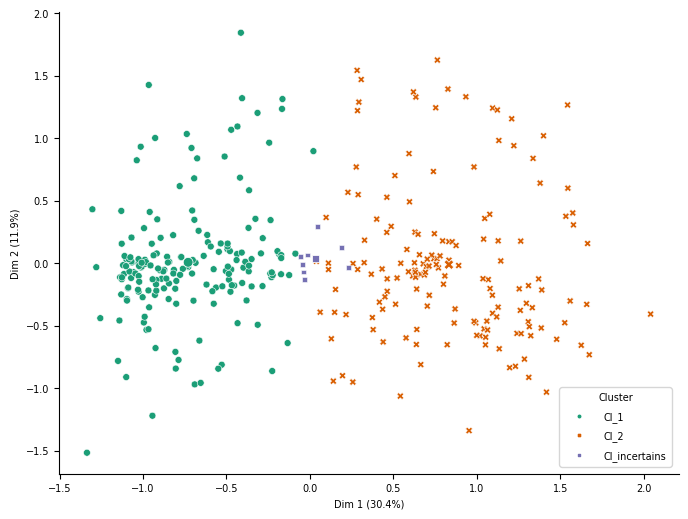

In [4]:
display_results_evidential(X, ecm_models, numeric_labels, up_low_appr=False)

## Weighted ECM (WECM)

In [19]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", stopping_factor="center")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.2849651540934209, 0.2849653124717886, 0.2849658994559569, 0.28496644297111373, 0.28496667499840106, 0.2849667854135065, 0.28496730915517965, 0.2849676831695135, 0.28496782152739353, 0.2849679185744688]
ARI values: [0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524]
NS values: [0.8817283121218532, 0.881710194371548, 1.0328703281495217, 0.8817753488097753, 1.0329010535886394, 1.032907758338568, 0.8818281364696997, 1.032917502570901, 0.881858288577301, 0.8818566051705373]
NMI values: [0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625]


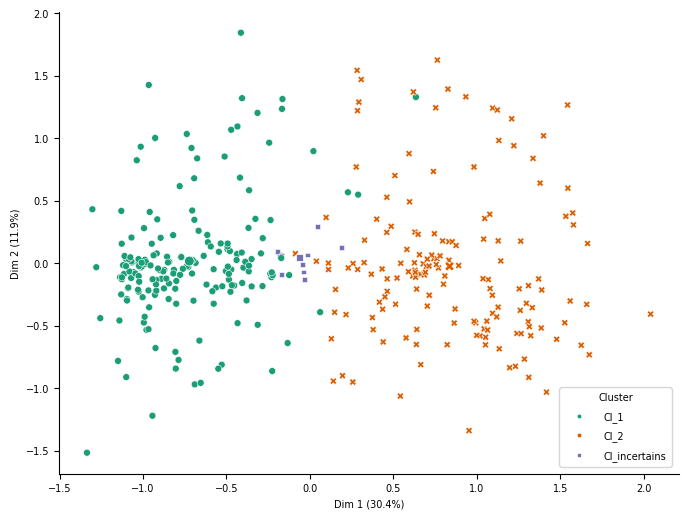

In [20]:
display_results_evidential(X, wecm_models, numeric_labels, up_low_appr=False)

# Weighted FCM - Keller et al. 2000

In [7]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.35615373110673665, 0.3561538218173753, 0.35615384300182873, 0.3561539001979994, 0.3561539393032047, 0.35615395204386285, 0.3561539817312977, 0.35615399402825787, 0.3561540577448985, 0.35615412933270274]
ARI values: [0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.1585855396689369]
NMI values: [0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11751290981830452]


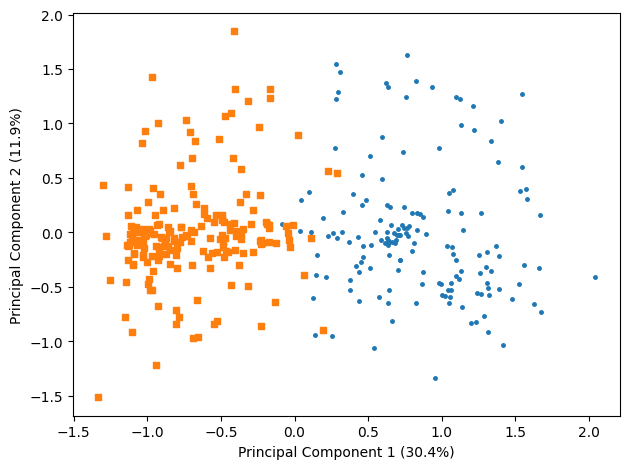

In [8]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [9]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=0.54, verbose=True, init="None")
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [0.3769100152820307, 0.37694924676710795]
ARI values: [0.17760685473768603, 0.17760685473768603]
NMI values: [0.13485692093441007, 0.13485692093441007]


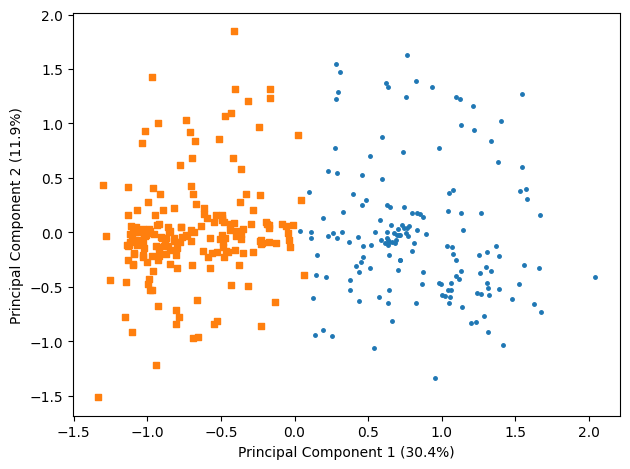

In [10]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [11]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, init="None")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [36.051055525747685, 36.05138937095919, 36.051392437152856, 36.05139835406356, 36.051412669852134, 36.05152568339227, 36.0515762723993, 36.05175897615196, 36.0522452156018, 37.587564955362375]
ARI values: [0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.1499556699843217]
NMI values: [0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.1182789116462489]


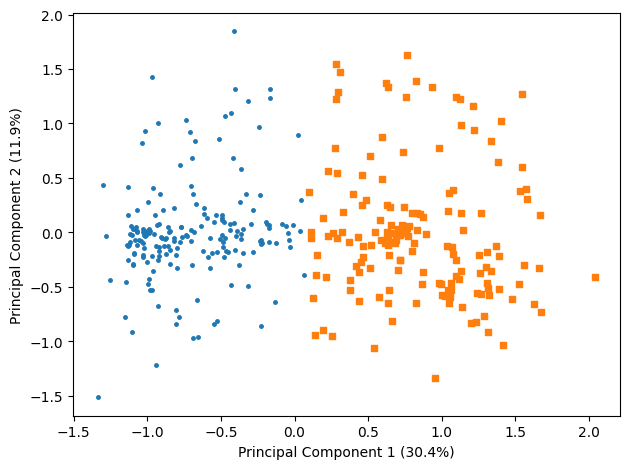

In [12]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [13]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.35653279345536615, 0.35660463980974716, 0.35662371230034695, 0.35665162536417877, 0.3566687254682502, 0.3566818849230217, 0.3566963126652788, 0.35675651121685437, 0.35682314592689635, 0.35685404440612994]
ARI values: [0.1679020141425987, 0.1728445165945166, 0.17760685473768603, 0.1728445165945166, 0.1679020141425987, 0.1728445165945166, 0.1777181019754806, 0.17760685473768603, 0.17272431159329507, 0.1728445165945166]
NMI values: [0.12499703986592361, 0.13198407345907473, 0.13485692093441007, 0.13198407345907473, 0.12499703986592361, 0.13198407345907473, 0.1370541335594139, 0.13485692093441007, 0.12986611168695084, 0.13198407345907473]


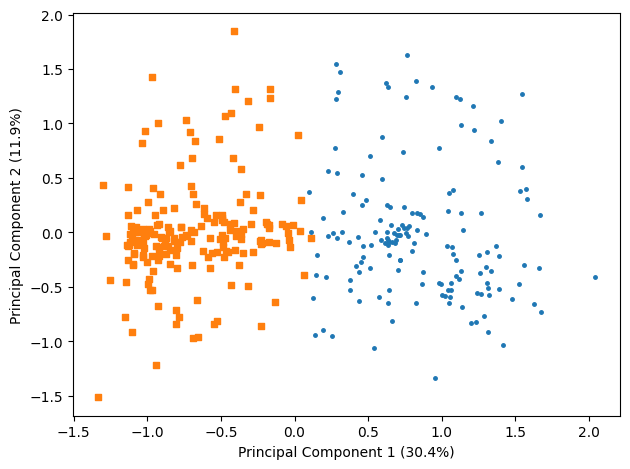

In [14]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [15]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.36088351343328995, 0.3609953883357897, 0.3610274832921867, 0.36105513853240867, 0.3610860866549297, 0.36127573170383354, 0.3614068227112167, 0.3668448096945055, 0.36708016032714735, 0.36873213032034957]
ARI values: [0.14058364744566526, 0.16339987173320505, 0.15409285660594824, 0.14952966587985306, 0.15432169892139133, 0.16814380977670004, 0.163504651593866, 0.15432169892139133, 0.11240795471622501, 0.013086276200118282]
NMI values: [0.10153507336542474, 0.12425801135791263, 0.11482443273002596, 0.11028275479208074, 0.11882663787978835, 0.12915635009905566, 0.12637283811168287, 0.11882663787978835, 0.08661111318383259, 0.02025985946902891]


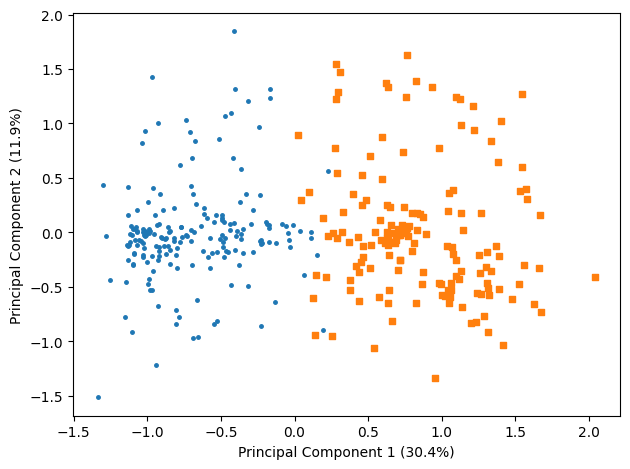

In [16]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [17]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [4.143609410237769, 4.143654734274243, 4.14383416698983, 4.144379600180373, 4.144409231300058, 4.144481882824856, 4.144580731971402, 4.144630149302136, 4.1446602626712075, 4.144671236617381]
ARI values: [0.14952966587985306, 0.14952966587985306, 0.14952966587985306, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505]
NMI values: [0.11028275479208074, 0.11028275479208074, 0.11028275479208074, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263]


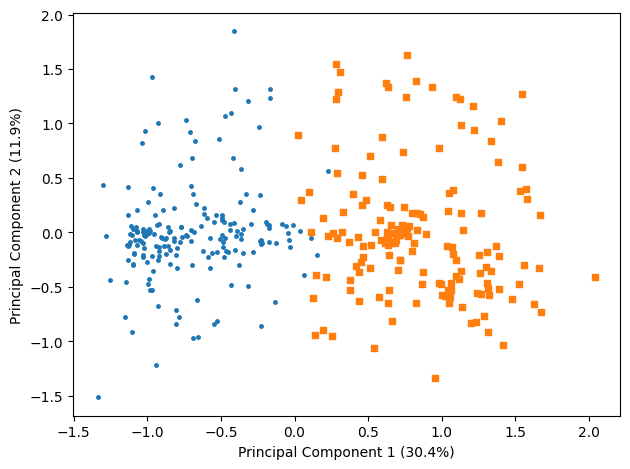

In [18]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)